<a href="https://colab.research.google.com/github/bivekpok/DSPS_BPokhrel/blob/main/HW4/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [33]:
...

#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [34]:
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/m31.csv', skipinitialspace=True, skiprows = [0])

In [35]:
m31.head()

,#R(kpc,V(km/s),St.dev.,St.error
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [36]:
mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/360e48bf3b762be5d17d2c2d595a03a23f334451/HW4/mw.csv', skiprows = [0])
mw.head()

,R(kpc),V(km/s),St.dev.,St.error
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


# exploratory data analysis
proceed with at least a few basic exploratory tasks

In [37]:
m31.describe()

,#R(kpc,V(km/s),St.dev.,St.error
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


In [38]:
mw.describe()

,R(kpc),V(km/s),St.dev.,St.error
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249063,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   


In [39]:
 apparentSizeM31 = 3.167 #degree


In [40]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [41]:
distance = (2.52 * (10**6) * u.lightyear).to(u.kpc)
dist_error = (0.14 * (10**6) * u.lightyear).to(u.kpc)

print(f' distance from the observer is : {distance:.2f}')
print(f' error in the distance is : {dist_error:.2f}')


 distance from the observer is : 772.64 kpc
 error in the distance is : 42.92 kpc


In [42]:
def physical_size(d, angle):
  """ Return:Physical size of the object from the angular size and the distance. """
  L = 2* d * np.tan(angle/2)
  return L

In [43]:
m31Size = physical_size(distance, m31angS.to(u.rad))
m31size_error = physical_size(dist_error, m31angS.to(u.rad)) # assuming only error in distance and not in angle
print("Size of the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31size_error))#, m31SizeError


Size of the visible component of Andromeda: 43 kpc +/- 2.4 kpc


Print the distance like I printed the angular size.

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [44]:
th = 0.00
# m31.columns
m31_all = m31[m31['#R(kpc'] > 43]
luminous_size = m31_all['#R(kpc'].values[0]
luminous_velocity= m31_all['V(km/s)'].values[0]
print(f'luminous_size: {luminous_size:0.2f}')
print(f'luminous_velocity: {luminous_velocity:0.2f}')
print(m31_all)

luminous_size: 49.22
luminous_velocity: 237.07
      #R(kpc  V(km/s)  St.dev.  St.error
34    49.222  237.069  109.381    23.924
35    59.067  249.443  134.552    26.447
36    70.880  218.489  132.355    24.657
37    85.056  206.603  135.003    27.258
38   102.068  213.002  132.456    29.321
39   122.481  197.383  105.727    23.358
40   146.977  177.521   81.762    16.662
41   176.373  165.325   74.652    15.706
42   211.647  165.134   76.929    18.733
43   253.977  160.787   77.400    22.720
44   304.772  151.102   74.793    27.879
45   365.727  121.974   96.480    43.431
46   438.872  168.303  125.736    51.482
47   526.647  200.545  123.350    52.949
48   631.976  238.973  147.835    36.195
49   758.371  248.069  145.005    19.716
50   910.046  250.377  141.353    22.663
51  1092.055  241.900  138.657    39.031
52  1310.466  235.039  103.480    46.508
53  1572.559  332.734  109.504    54.110
54  1887.071  414.942   69.579    27.931


We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [63]:
# first measurement including all mass
# def getradii(...):
def getradii(data, N =2, lumin_size = luminous_size):
    """
    Find the smallest radius in the dataset that is at least N times the luminous size.

    Args:
        data (DataFrame): The dataset containing radius, velocity, standard deviation, and standard error.
        N (float): A factor to determine the minimum radius.
        luminous_size (float): The size of the luminous component of the galaxy.

    Returns:
        Tuple: (radius, radius_uncertainty, velocity, velocity_uncertainty)
    """
    # Filter the dataset to find the rows where radius >= N * luminous_size
    filtered_data = data[data['#R(kpc'] >= N * luminous_size]
    sorted_data = filtered_data.sort_values(by = '#R(kpc')

    if filtered_data.empty:
        return None  # No matching data found

    # Get the first row of the filtered data
    first_row = sorted_data.iloc[0]

    # Extract the values
    radius = first_row['#R(kpc']
    sd = first_row['St.dev.']
    velocity = first_row['V(km/s)']
    err = first_row['St.error']

    return radius, sd, velocity, err

print(getradii(m31, N=1))
print(getradii(m31, N=2))
print(getradii(m31, N=3))
radius1, sd1, velocity1, err1 = getradii(m31, N=1)
radius2, sd2, velocity2, err2 = getradii(m31, N=2)
radius3, sd3, velocity3, err3 = getradii(m31, N=3)
radius = {}
sd = {}
velocity = {}
err = {}
for i in range(3):
  radius[i+1], sd[i+1], velocity[i+1], err[i+1] = getradii(m31, N=i+1)
print(radius)



...

(49.222, 109.381, 237.069, 23.924)
(102.068, 132.456, 213.002, 29.321)
(176.373, 74.652, 165.325, 15.706)
{1: 49.222, 2: 102.068, 3: 176.373}


Ellipsis

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

1
49.222 109.381 237.069 23.924
2
102.068 132.456 213.002 29.321
3
176.373 74.652 165.325 15.706


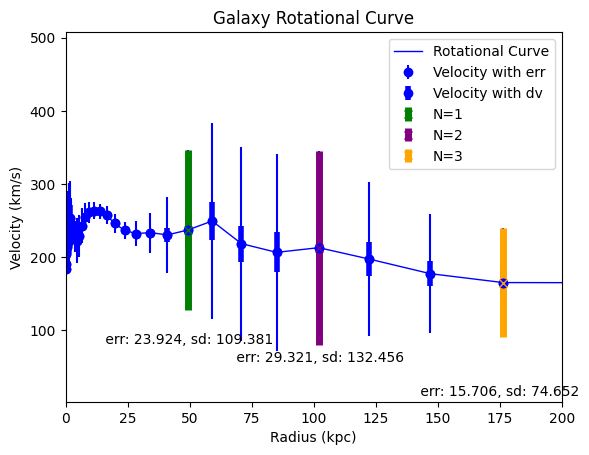

In [92]:
N_values = [1, 2, 3]
all_radius = m31['#R(kpc']
all_velocity = m31['V(km/s)']
all_err = m31['St.error']
all_sd = m31['St.dev.']

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the rotational curve as a line
ax.plot(all_radius, all_velocity, label='Rotational Curve', color='blue', linestyle='-', linewidth=1)

# Plot each velocity as an error bar with error equal to err
ax.errorbar(all_radius, all_velocity, yerr=all_sd, fmt='o', label='Velocity with err', color='blue')

# Plot each velocity as an error bar with error equal to dv and different line thickness
ax.errorbar(all_radius, all_velocity, yerr=all_err, fmt='o', label='Velocity with dv', color='blue', linewidth=4)

# Plot data points corresponding to N=1, 2, 3 in different colors
for N, color in zip(N_values, ['green', 'purple', 'orange']):
  print(N)
  print(radius[N], sd[N], velocity[N], err[N])
#   radius{N}, sd{N}, velocity{N}, err{N} = getradii(m31, N, lumin_size=luminous_size)
#   print(radius)
#   print(velocity)

  # ax.errorbar(radius[N], velocity[N], yerr = err[N], fmt='o', label=f'N={N}', color=color)
  ax.errorbar(radius[N], velocity[N], yerr = sd[N], fmt='x', label=f'N={N}', color=color, linewidth = 5)


# # Add a legend
  ax.legend()

  # # Add text indicating velocity and its uncertainty (dv and err) below the largest error bar
  # max_err_index = err.index(max(all_err))
  ax.text(radius[N]-35, velocity[N] - 1.05*np.max(all_sd), f' err: {err[N]}, sd: {sd[N]}')
  # Limit the x-axis to the "relevant" portion of the data
  ax.set_xlim(0, 0.6)

  # Add labels and title
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel('Velocity (km/s)')
plt.title('Galaxy Rotational Curve')
ax.set_xlim(0, 200)

# Display the plot
plt.show()


In [ ]:
#delete leave plot
def plotGal(gal, rds):
    ...
plotGal(m31, m31Rds)
#m31, m31Rds

Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [ ]:
#delete
def vratios(...):
  ...


In [ ]:
vratios(m31, m31Rds, 1)

vratios(m31, m31Rds, 1, err='err')

In [ ]:
vratios(m31, m31Rds, 2)

In [ ]:
vratios(m31, m31Rds, 2, err='err')

### Discuss!

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [ ]:
#delete all below

https://en.wikipedia.org/wiki/Milky_Way
    